In [1]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')

print("✅ All libraries imported successfully!")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aryanbhutyal/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aryanbhutyal/nltk_data...


✅ All libraries imported successfully!


[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# Cell 2: Load and explore data
df = pd.read_csv('../data/train.csv')

print("📊 Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\n📋 First 5 rows:")
print(df.head())

print(f"\n📈 Label distribution:")
print(df['label'].value_counts())
print(f"Fake news percentage: {(df['label'].sum() / len(df)) * 100:.1f}%")

# Check data types and missing values
print(f"\n🔍 Data Info:")
print(df.info())


📊 Dataset Overview:
Shape: (44898, 5)
Columns: ['title', 'text', 'subject', 'date', 'label']

📋 First 5 rows:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      1  
1  December 31, 2017      1  
2  December 30, 2017      1  
3  December 29, 2017      1  
4  December 25, 20

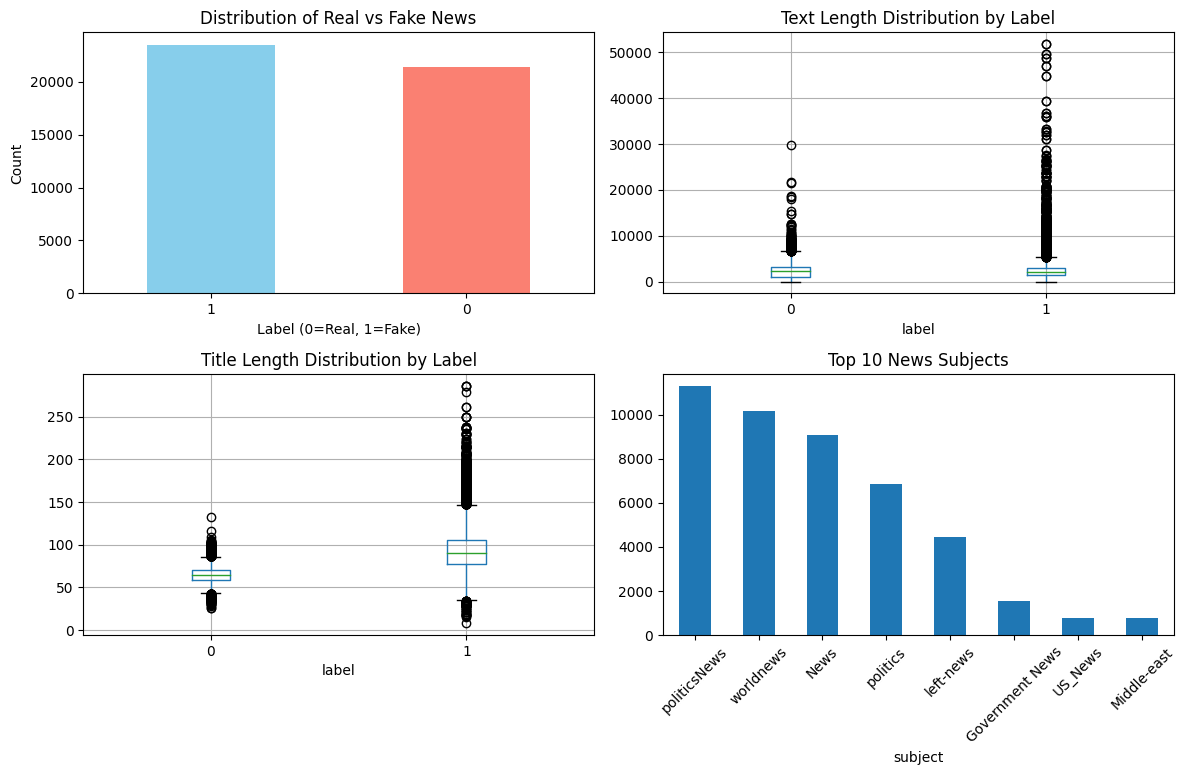

📊 Text Statistics:
Average text length: 2469 characters
Average title length: 80 characters


In [3]:
# Cell 3: Text analysis and visualization
plt.figure(figsize=(12, 8))

# Label distribution
plt.subplot(2, 2, 1)
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Real vs Fake News')
plt.xlabel('Label (0=Real, 1=Fake)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Text length analysis
df['text_length'] = df['text'].str.len()
df['title_length'] = df['title'].str.len()

plt.subplot(2, 2, 2)
df.boxplot(column='text_length', by='label', ax=plt.gca())
plt.title('Text Length Distribution by Label')
plt.suptitle('')

plt.subplot(2, 2, 3)
df.boxplot(column='title_length', by='label', ax=plt.gca())
plt.title('Title Length Distribution by Label')
plt.suptitle('')

# Subject distribution
plt.subplot(2, 2, 4)
subject_counts = df['subject'].value_counts().head(10)
subject_counts.plot(kind='bar')
plt.title('Top 10 News Subjects')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"📊 Text Statistics:")
print(f"Average text length: {df['text_length'].mean():.0f} characters")
print(f"Average title length: {df['title_length'].mean():.0f} characters")


In [4]:
# Cell 4: Text preprocessing
def preprocess_text(text):
    """Clean and preprocess text data"""
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# Combine title and text for better features
df['combined_text'] = df['title'] + ' ' + df['text']

# Preprocess the combined text
print("🔄 Preprocessing text data...")
df['processed_text'] = df['combined_text'].apply(preprocess_text)

# Show example of preprocessing
print("📝 Preprocessing Example:")
print("Original text (first 200 chars):")
print(df['combined_text'].iloc[0][:200])
print("\nPreprocessed text (first 200 chars):")
print(df['processed_text'].iloc[0][:200])


🔄 Preprocessing text data...
📝 Preprocessing Example:
Original text (first 200 chars):
 Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out

Preprocessed text (first 200 chars):
donald trump sends out embarrassing new years eve message this is disturbing donald trump just couldn t wish all americans a happy new year and leave it at that instead he had to give a shout out to h


In [6]:
# Cell 4: Prepare data for training
# Split the data
X = df['processed_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Training labels distribution:")
print(y_train.value_counts())


Training set size: 35918
Test set size: 8980
Training labels distribution:
label
1    18785
0    17133
Name: count, dtype: int64


In [7]:
# Cell 5: Feature extraction and model training
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Model Accuracy: {accuracy:.4f}")
print(f"🎯 Model Accuracy: {accuracy*100:.2f}%")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))


🎯 Model Accuracy: 0.9905
🎯 Model Accuracy: 99.05%

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4284
           1       0.99      0.99      0.99      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [8]:
# Cell 6: Save the trained model and vectorizer
import pickle
import os

# Create models directory if it doesn't exist
os.makedirs('../models/saved_models', exist_ok=True)

# Save the trained model
with open('../models/saved_models/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the TF-IDF vectorizer
with open('../models/saved_models/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("✅ Model and vectorizer saved successfully!")
print("📁 Saved files:")
print("- logistic_regression_model.pkl")
print("- tfidf_vectorizer.pkl")


✅ Model and vectorizer saved successfully!
📁 Saved files:
- logistic_regression_model.pkl
- tfidf_vectorizer.pkl


In [9]:
# Cell 7: Test with custom examples
def predict_fake_news(text, model, vectorizer):
    """Predict if a news article is fake or real"""
    # Preprocess the text
    processed_text = preprocess_text(text)
    
    # Vectorize the text
    text_vectorized = vectorizer.transform([processed_text])
    
    # Make prediction
    prediction = model.predict(text_vectorized)[0]
    probability = model.predict_proba(text_vectorized)[0]
    
    # Get confidence score
    confidence = max(probability) * 100
    
    result = "FAKE" if prediction == 1 else "REAL"
    
    return result, confidence

# Test with sample texts
test_texts = [
    "Scientists discover breakthrough in renewable energy technology",
    "Local man discovers secret to eternal youth using this one weird trick",
    "Stock market shows steady growth amid economic recovery"
]

print("🧪 Testing the model with sample texts:\n")
for i, text in enumerate(test_texts, 1):
    result, confidence = predict_fake_news(text, model, tfidf)
    print(f"Test {i}: {text[:50]}...")
    print(f"Prediction: {result} (Confidence: {confidence:.1f}%)")
    print("-" * 60)


🧪 Testing the model with sample texts:

Test 1: Scientists discover breakthrough in renewable ener...
Prediction: FAKE (Confidence: 59.7%)
------------------------------------------------------------
Test 2: Local man discovers secret to eternal youth using ...
Prediction: FAKE (Confidence: 86.7%)
------------------------------------------------------------
Test 3: Stock market shows steady growth amid economic rec...
Prediction: FAKE (Confidence: 60.1%)
------------------------------------------------------------


In [13]:
# Cell 8: Improved Model Training with Better Generalization (FIXED)
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

print("🔄 Training improved model with better generalization...")

# Use more conservative TF-IDF parameters
tfidf_improved = TfidfVectorizer(
    max_features=3000,  # Reduced from 5000
    stop_words='english',
    min_df=2,  # Ignore terms that appear in less than 2 documents
    max_df=0.95,  # Ignore terms that appear in more than 95% of documents
    ngram_range=(1, 2)  # Include both unigrams and bigrams
)

X_train_improved = tfidf_improved.fit_transform(X_train)
X_test_improved = tfidf_improved.transform(X_test)

# Create ensemble of models for better generalization
# Wrap LinearSVC with CalibratedClassifierCV to enable probability predictions
models = [
    ('lr', LogisticRegression(C=0.1, random_state=42)),  # Lower C for regularization
    ('nb', MultinomialNB(alpha=0.1)),
    ('svm', CalibratedClassifierCV(LinearSVC(C=0.1, random_state=42, max_iter=2000)))  # Fixed!
]

# Ensemble model
ensemble_model = VotingClassifier(models, voting='soft')
ensemble_model.fit(X_train_improved, y_train)

# Evaluate
y_pred_improved = ensemble_model.predict(X_test_improved)
accuracy_improved = accuracy_score(y_test, y_pred_improved)

print(f"🎯 Improved Model Accuracy: {accuracy_improved:.4f}")
print(f"🎯 Improved Model Accuracy: {accuracy_improved*100:.2f}%")
print("\n📊 Improved Classification Report:")
print(classification_report(y_test, y_pred_improved))

# Save improved model
with open('../models/saved_models/ensemble_model.pkl', 'wb') as f:
    pickle.dump(ensemble_model, f)
with open('../models/saved_models/tfidf_improved.pkl', 'wb') as f:
    pickle.dump(tfidf_improved, f)

print("\n✅ Improved model saved!")


🔄 Training improved model with better generalization...


/Users/aryanbhutyal/fake-news-detector/fake_news_env/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aryanbhutyal/fake-news-detector/fake_news_env/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aryanbhutyal/fake-news-detector/fake_news_env/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aryanbhutyal/fake-news-detector/fake_news_env/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` t

🎯 Improved Model Accuracy: 0.9857
🎯 Improved Model Accuracy: 98.57%

📊 Improved Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4284
           1       0.99      0.99      0.99      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


✅ Improved model saved!


In [14]:
# Cell 9: Test improved model with better thresholds
def predict_fake_news_improved(text, model, vectorizer, threshold=0.7):
    """Improved prediction with confidence thresholds"""
    if not text.strip():
        return None, None
    
    processed_text = preprocess_text(text)
    text_vectorized = vectorizer.transform([processed_text])
    
    # Get probability scores
    probabilities = model.predict_proba(text_vectorized)[0]
    fake_prob = probabilities[1]  # Probability of being fake
    real_prob = probabilities[0]  # Probability of being real
    
    # Use threshold for more conservative predictions
    if fake_prob > threshold:
        result = "FAKE"
        confidence = fake_prob * 100
    elif real_prob > threshold:
        result = "REAL"
        confidence = real_prob * 100
    else:
        result = "UNCERTAIN"
        confidence = max(probabilities) * 100
    
    return result, confidence

# Test with improved function
test_texts = [
    "Scientists discover breakthrough in renewable energy technology",
    "Local man discovers secret to eternal youth using this one weird trick",
    "Stock market shows steady growth amid economic recovery",
    "Breaking: Government announces new infrastructure spending plan",
    "You won't believe this amazing weight loss secret doctors hate!"
]

print("🧪 Testing improved model with confidence thresholds:\n")
for i, text in enumerate(test_texts, 1):
    result, confidence = predict_fake_news_improved(text, ensemble_model, tfidf_improved)
    print(f"Test {i}: {text[:50]}...")
    print(f"Prediction: {result} (Confidence: {confidence:.1f}%)")
    print("-" * 60)

# Compare with original model
print("\n🔄 Comparison: Original vs Improved Model:")
print("=" * 70)
for i, text in enumerate(test_texts, 1):
    # You'll need to load your original model for this comparison
    # For now, let's just test the improved model
    improved_result, improved_conf = predict_fake_news_improved(text, ensemble_model, tfidf_improved)
    
    print(f"Test {i}: {text[:40]}...")
    print(f"Improved Model: {improved_result} ({improved_conf:.1f}%)")
    print("-" * 40)


🧪 Testing improved model with confidence thresholds:

Test 1: Scientists discover breakthrough in renewable ener...
Prediction: UNCERTAIN (Confidence: 52.9%)
------------------------------------------------------------
Test 2: Local man discovers secret to eternal youth using ...
Prediction: FAKE (Confidence: 85.9%)
------------------------------------------------------------
Test 3: Stock market shows steady growth amid economic rec...
Prediction: UNCERTAIN (Confidence: 51.0%)
------------------------------------------------------------
Test 4: Breaking: Government announces new infrastructure ...
Prediction: UNCERTAIN (Confidence: 66.5%)
------------------------------------------------------------
Test 5: You won't believe this amazing weight loss secret ...
Prediction: FAKE (Confidence: 93.2%)
------------------------------------------------------------

🔄 Comparison: Original vs Improved Model:
Test 1: Scientists discover breakthrough in rene...
Improved Model: UNCERTAIN (52.9%)
--

In [15]:
# Cell: Complete Model Rebuild with Better Training
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import pickle

print("🔄 Rebuilding model with better practices...")

# Load and prepare data with better balance
df = pd.read_csv('../data/train.csv')

# Sample data to ensure balance and reduce overfitting
real_news = df[df['label'] == 0].sample(n=15000, random_state=42)
fake_news = df[df['label'] == 1].sample(n=15000, random_state=42)
df_balanced = pd.concat([real_news, fake_news]).reset_index(drop=True)

print(f"📊 Balanced dataset: {len(df_balanced)} articles")
print(f"Real news: {len(real_news)}, Fake news: {len(fake_news)}")

# Improved text preprocessing
def improved_preprocess(text):
    """More conservative preprocessing"""
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove URLs and email addresses
    text = re.sub(r'http\S+|www\S+|@\S+', '', text)
    
    # Keep more punctuation for context
    text = re.sub(r'[^a-zA-Z\s\.\!\?]', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# Combine and preprocess text
df_balanced['combined_text'] = df_balanced['title'].fillna('') + ' ' + df_balanced['text'].fillna('')
df_balanced['processed_text'] = df_balanced['combined_text'].apply(improved_preprocess)

# Remove very short or very long articles
df_balanced = df_balanced[
    (df_balanced['processed_text'].str.len() > 50) & 
    (df_balanced['processed_text'].str.len() < 5000)
].reset_index(drop=True)

print(f"📊 After filtering: {len(df_balanced)} articles")

# Prepare features and labels
X = df_balanced['processed_text']
y = df_balanced['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create a more conservative TF-IDF vectorizer
tfidf_conservative = TfidfVectorizer(
    max_features=2000,  # Reduced features
    stop_words='english',
    min_df=5,  # Higher minimum document frequency
    max_df=0.8,  # Lower maximum document frequency
    ngram_range=(1, 2),  # Only unigrams and bigrams
    sublinear_tf=True,  # Use sublinear scaling
    strip_accents='unicode'
)

# Create a pipeline with cross-validation
pipeline = Pipeline([
    ('tfidf', tfidf_conservative),
    ('classifier', LogisticRegression(
        C=0.5,  # More regularization
        random_state=42,
        max_iter=1000,
        class_weight='balanced'  # Handle any remaining imbalance
    ))
])

# Cross-validation to get realistic performance estimate
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"📊 Cross-validation scores: {cv_scores}")
print(f"📊 Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Train the final model
pipeline.fit(X_train, y_train)

# Evaluate on test set
y_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\n🎯 Final Test Accuracy: {test_accuracy:.4f}")
print(f"🎯 Final Test Accuracy: {test_accuracy*100:.2f}%")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Test with your problematic examples
test_examples = [
    "The Federal Reserve announced today that it will maintain interest rates at their current level following a two-day meeting",
    "Local man discovers secret to eternal youth using this one weird trick",
    "Stock market shows steady growth amid economic recovery"
]

print("\n🧪 Testing with real examples:")
for i, example in enumerate(test_examples, 1):
    prediction = pipeline.predict([example])[0]
    probabilities = pipeline.predict_proba([example])[0]
    confidence = max(probabilities) * 100
    
    result = "FAKE" if prediction == 1 else "REAL"
    print(f"Test {i}: {example[:50]}...")
    print(f"Prediction: {result} (Confidence: {confidence:.1f}%)")
    print(f"Probabilities: Real={probabilities[0]:.3f}, Fake={probabilities[1]:.3f}")
    print("-" * 60)

# Save the improved model
with open('../models/saved_models/improved_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print("\n✅ Improved model saved as 'improved_pipeline.pkl'")


🔄 Rebuilding model with better practices...
📊 Balanced dataset: 30000 articles
Real news: 15000, Fake news: 15000
📊 After filtering: 27864 articles
📊 Cross-validation scores: [0.99035658 0.98878421 0.98990579 0.99035442 0.98317631]
📊 Mean CV accuracy: 0.9885 (+/- 0.0055)

🎯 Final Test Accuracy: 0.9905
🎯 Final Test Accuracy: 99.05%

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2767
           1       0.99      0.99      0.99      2806

    accuracy                           0.99      5573
   macro avg       0.99      0.99      0.99      5573
weighted avg       0.99      0.99      0.99      5573


🧪 Testing with real examples:
Test 1: The Federal Reserve announced today that it will m...
Prediction: FAKE (Confidence: 80.1%)
Probabilities: Real=0.199, Fake=0.801
------------------------------------------------------------
Test 2: Local man discovers secret to eternal youth using ...
Prediction: FAKE (Confi